In [1]:
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

from iFEMG_feature import *

In [2]:
# load all experimental data in signal_df 
# file path format: 'D:\\folder path\\subject name\\label_(rest/active).mat'
file_folder_path = 'D:\code\data\iFEMG_data_set'
subjects = ['\zpk1', '\zpk2', '\zpk3', '\zpk4', '\zpk5', '\zpk6']
mat_name = ['d0', 'd2', 'd5', 'd7', 'dm']

signal_df = pd.DataFrame(columns = ('subject_name', 'rest_signal', 'active_signal', 'label', 'sensor_channel'))
# rest/active signal: [:, 0]FMG, [:, 1]sEMG

for i in subjects:
    for j in mat_name:
        # print('processing: ', i + j)
        # build data frame, every row has a unique label
        signal_df = signal_df.append({'subject_name' : i,
                                    'rest_signal': sio.loadmat(file_folder_path + i + '\\' + j + '_rest.mat')[j + '_rest'],
                                    'active_signal': sio.loadmat(file_folder_path + i + '\\' + j + '_active.mat')[j + '_active'], 
                                    'label' : j,
                                    'sensor_channel' : 'bicps_br'}, ignore_index=True)
    pass

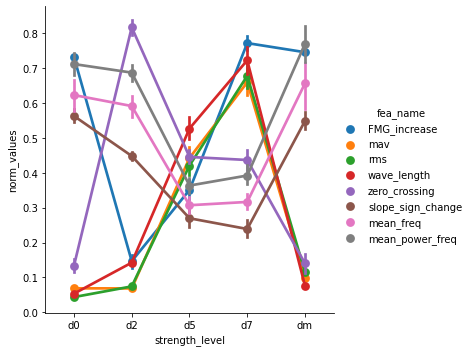

In [3]:
'''
1st index: subjects
2nd index: force level
3rd index: sensor channel
FMG + sEMG + ultrasound
'''
'''
feature name:
    FMG_increase
    sEMG:
        mav
        rms
        wave_length
        zero_crossing
        slope_sign_change
        mean_freq
        mean_power_freq
'''
# init a dataframe to store features
# get feature dataframe
sb_feature_df =pd.DataFrame(columns=('subject_name', 'label', 'FMG_increase', 'mav', 'rms', 'wave_length', 'zero_crossing', 'slope_sign_change', 'mean_freq', 'mean_power_freq'))

# 使用boolean值索引出某一名受试者的实验数据
sb_data = signal_df.loc[signal_df.loc[:, 'subject_name'] == '\zpk2']
# 计算一名被试的所有特征
for row in sb_data.itertuples():
    # init data object
    FMG = FMGFeature(row.rest_signal[:, 0], row.active_signal[:, 0], 1223)
    sEMG = sEMGFeature(row.rest_signal[:, 1], row.active_signal[:, 1], 1223)
    # set window_length and step_increase
    FMG.signal_segment(2446, 500)
    sEMG.signal_segment(2446, 500)
    # print(row.label)
    temp_FMG_fea = FMG.FMG_increase()
    temp_mav = sEMG.feature_mav()
    temp_rms = sEMG.feature_rms()
    temp_wl = sEMG.feature_wl()
    temp_zc = sEMG.feature_zc()
    temp_ssc = sEMG.feature_ssc()
    temp_sEMG_freq_fea = sEMG.freq_features()
    temp_len = len(temp_FMG_fea)
    for i in range(temp_len):
        sb_feature_df = sb_feature_df.append({'subject_name': row.subject_name,
                                            'label': row.label,
                                            'FMG_increase': temp_FMG_fea[i],
                                            'mav': temp_mav[i],
                                            'rms': temp_rms[i],
                                            'wave_length': temp_wl[i],
                                            'zero_crossing': temp_zc[i],
                                            'slope_sign_change': temp_ssc[i],
                                            'mean_freq': temp_sEMG_freq_fea[i][0],
                                            'mean_power_freq': temp_sEMG_freq_fea[i][1]}, ignore_index=True)
        pass
    pass

# signal features normalization
sb_fea_norm_df = fea_df_norm(sb_feature_df, 'FMG_increase', 'mav', 'rms', 'wave_length', 'zero_crossing', 'slope_sign_change', 'mean_freq', 'mean_power_freq')

# show figure
show_df = pd.DataFrame(columns = ('subject', 'strength_level', 'norm_values', 'fea_name'))

for row in sb_fea_norm_df.itertuples():    # go through each row
    for i in ['FMG_increase', 'mav', 'rms', 'wave_length', 'zero_crossing', 'slope_sign_change', 'mean_freq', 'mean_power_freq']:
        show_df = show_df.append({'subject': row.subject_name,
                                'strength_level': row.label,
                                'norm_values': getattr(row, i),
                                'fea_name': i}, ignore_index=True)

sns.catplot(x = "strength_level",
            y = "norm_values",
            hue = "fea_name",
            data = show_df,
            kind = 'point')

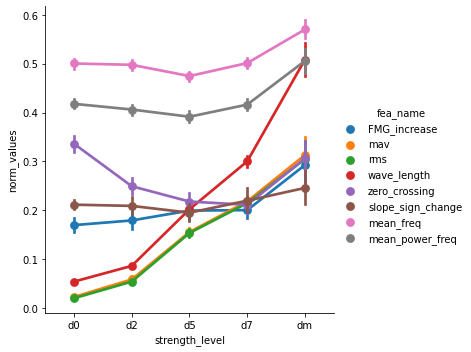

In [4]:
# 处理所有数据
all_feature_df =pd.DataFrame(columns=('subject_name', 'label', 'FMG_increase', 'mav', 'rms', 'wave_length', 'zero_crossing', 'slope_sign_change', 'mean_freq', 'mean_power_freq'))

for row in signal_df.itertuples():
    FMG = FMGFeature(row.rest_signal[:, 0], row.active_signal[:, 0], 1223)
    sEMG = sEMGFeature(row.rest_signal[:, 1], row.active_signal[:, 1], 1223)
    FMG.signal_segment(1223, 500)
    sEMG.signal_segment(1223, 500)
    # print(row.label)
    temp_FMG_fea = FMG.FMG_increase()
    temp_mav = sEMG.feature_mav()
    temp_rms = sEMG.feature_rms()
    temp_wl = sEMG.feature_wl()
    temp_zc = sEMG.feature_zc()
    temp_ssc = sEMG.feature_ssc()
    temp_sEMG_freq_fea = sEMG.freq_features()
    temp_len = len(temp_FMG_fea)
    for i in range(temp_len):
        all_feature_df = all_feature_df.append({'subject_name': row.subject_name,
                                            'label': row.label,
                                            'FMG_increase': temp_FMG_fea[i],
                                            'mav': temp_mav[i],
                                            'rms': temp_rms[i],
                                            'wave_length': temp_wl[i],
                                            'zero_crossing': temp_zc[i],
                                            'slope_sign_change': temp_ssc[i],
                                            'mean_freq': temp_sEMG_freq_fea[i][0],
                                            'mean_power_freq': temp_sEMG_freq_fea[i][1]}, ignore_index=True)
        pass
    pass
# normalization
all_fea_norm_df = fea_df_norm(all_feature_df, 'FMG_increase', 'mav', 'rms', 'wave_length', 'zero_crossing', 'slope_sign_change', 'mean_freq', 'mean_power_freq')

# show figure
show_df = pd.DataFrame(columns = ('subject', 'strength_level', 'norm_values', 'fea_name'))

for row in all_fea_norm_df.itertuples():    # go through each row
    for i in ['FMG_increase', 'mav', 'rms', 'wave_length', 'zero_crossing', 'slope_sign_change', 'mean_freq', 'mean_power_freq']:
        show_df = show_df.append({'subject': row.subject_name,
                                'strength_level': row.label,
                                'norm_values': getattr(row, i),
                                'fea_name': i}, ignore_index=True)

sns.catplot(x = "strength_level",
            y = "norm_values",
            hue = "fea_name",
            data = show_df,
            kind = 'point')